In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

Show Data info

In [2]:
df_v1 = pd.read_csv("Retail.csv")
print(df_v1.head())
print(df_v1.info())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo   

Drop Untargeted Data (that may bias the model)

In [3]:
# df_v1["InvoiceDate"] = pd.to_datetime(df_v1["InvoiceDate"]).dt.date
# df_v1["InvoiceDate"] = pd.to_datetime(df_v1["InvoiceDate"],format="%m/%d/%Y %H:%M")
df_v1.drop(columns=["Description","InvoiceNo","Country","InvoiceDate"],inplace=True)
print(df_v1.head())
print(df_v1.info())

  StockCode  Quantity  UnitPrice  CustomerID
0    85123A         6       2.55     17850.0
1     71053         6       3.39     17850.0
2    84406B         8       2.75     17850.0
3    84029G         6       3.39     17850.0
4    84029E         6       3.39     17850.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   StockCode   541909 non-null  object 
 1   Quantity    541909 non-null  int64  
 2   UnitPrice   541909 non-null  float64
 3   CustomerID  406829 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 16.5+ MB
None


print some information to help in Cleanning

In [4]:
print(df_v1.duplicated().sum())
print(df_v1.isna().sum())
print(df_v1.shape)
print((df_v1.isna().sum().CustomerID/df_v1.shape[0])*100)
print(df_v1[df_v1["CustomerID"].isna() == True].head(20))

178625
StockCode          0
Quantity           0
UnitPrice          0
CustomerID    135080
dtype: int64
(541909, 4)
24.926694334288598
     StockCode  Quantity  UnitPrice  CustomerID
622      22139        56       0.00         NaN
1443     21773         1       2.51         NaN
1444     21774         2       2.51         NaN
1445     21786         4       0.85         NaN
1446     21787         2       1.66         NaN
1447     21790         9       1.66         NaN
1448     21791         2       2.51         NaN
1449     21801        10       0.43         NaN
1450     21802         9       0.43         NaN
1451     21803        11       0.43         NaN
1452     21809         1       2.51         NaN
1453     21810         3       2.51         NaN
1454     21811         1       2.51         NaN
1455     21821         1       7.62         NaN
1456     21822         1       4.21         NaN
1457     21823         2       2.98         NaN
1458     21844         2       5.91         NaN
1

Clean Data Stage 1

In [5]:
df_v1.drop_duplicates()
df_v1.dropna(subset="CustomerID",inplace=True)
print(df_v1.shape)
print(df_v1[df_v1["Quantity"]== 0].value_counts().sum())
print(df_v1[df_v1["UnitPrice"]== 0].value_counts().sum())

(406829, 4)
0
40


Clean Data Stage 2

In [6]:
df_v1.drop(index=df_v1[df_v1["UnitPrice"]== 0].index,inplace=True)
df_v1["CustomerID"] = df_v1["CustomerID"].astype("int").astype("str")
# df_v1["PaidForUnit"] = df_v1["Quantity"] * df_v1["UnitPrice"]
df_v1.drop(columns="UnitPrice",inplace=True)
print(df_v1.info())
print(df_v1.head())
print(df_v1.nunique())

<class 'pandas.core.frame.DataFrame'>
Index: 406789 entries, 0 to 541908
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   StockCode   406789 non-null  object
 1   Quantity    406789 non-null  int64 
 2   CustomerID  406789 non-null  object
dtypes: int64(1), object(2)
memory usage: 12.4+ MB
None
  StockCode  Quantity CustomerID
0    85123A         6      17850
1     71053         6      17850
2    84406B         8      17850
3    84029G         6      17850
4    84029E         6      17850
StockCode     3684
Quantity       435
CustomerID    4371
dtype: int64


Encode Catigorical Data

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_v1["StockCode"] = le.fit_transform(df_v1["StockCode"])
df_v1["CustomerID"] = le.fit_transform(df_v1["CustomerID"])
df_v1.head()

,StockCode,Quantity,CustomerID
0,3249,6,4047
1,2649,6,4047
2,2855,8,4047
3,2803,6,4047
4,2802,6,4047


Scale Data

In [8]:
from sklearn.preprocessing import  StandardScaler
sc = StandardScaler()
X = sc.fit_transform(df_v1)

using Elbow Method to define no of Clusters

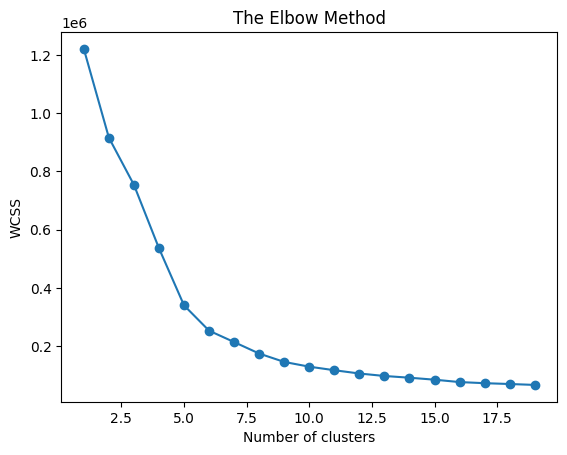

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i , init = 'k-means++' , random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Build the model using 5 Clusters

In [10]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
Y = kmeans.fit_predict(X)